# 05. forecast(시계열 분석)

## 1. 배경 및 설치

- 윈도우 경우 Visual C++ Build Tool을 먼저 설치하기
- conda install pandas-atareader
- conda install -c conda-forge fbprophet

새로운 가상환경 conda create -n [환경명] python=3.8

In [1]:
from pandas_datareader import data
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


---

## 함수(def) 기초

In [2]:
# 전역변수
a = 1

def edit_a(i):
    # 지역변수
    a = i

edit_a(2)
a

1

In [3]:
# 전역변수
a = 1

def edit_a(i):
    # 지역변수
    global a
    a = i

edit_a(2)
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언

$$ y = asin(2\pi ft + t_0) + b $$

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
def plotSineWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave
    y = a sin(2 pi ft + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(f'{amp}*sin(2*pi*{freq}*t + {startTime}) + {bias}')
    plt.show()

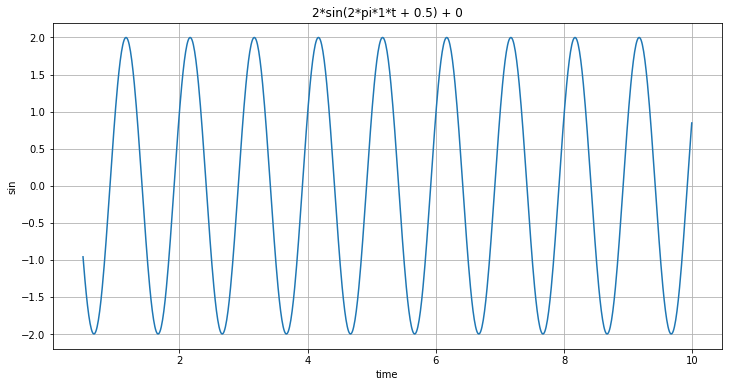

In [6]:
plotSineWave(2, 1, 10, 0.01, 0.5, 0)

In [7]:
def plotSineWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi ft + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))

    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(f'{amp}*sin(2*pi*{freq}*t + {startTime}) + {bias}')
    plt.show()

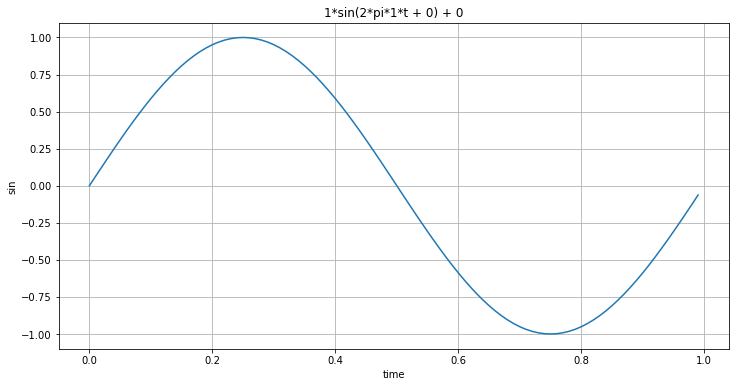

In [8]:
plotSineWave()

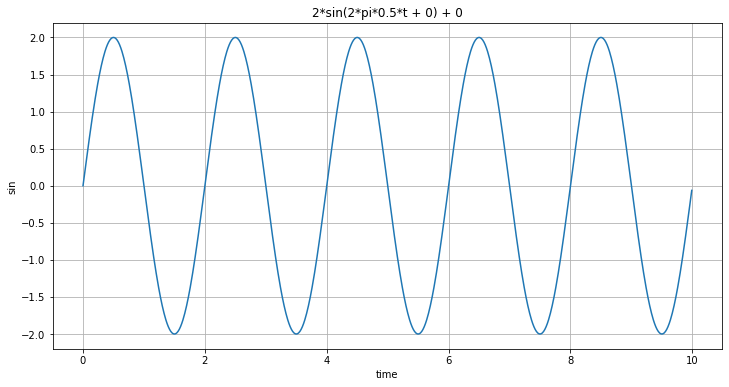

In [9]:
plotSineWave(amp=2, freq=0.5, endTime=10)

## 내가 만든 함수 import
- drawSinwave.py 파일로 만들어서 모듈화 시키기

In [10]:
import drawSinWave as Ds

C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_stud

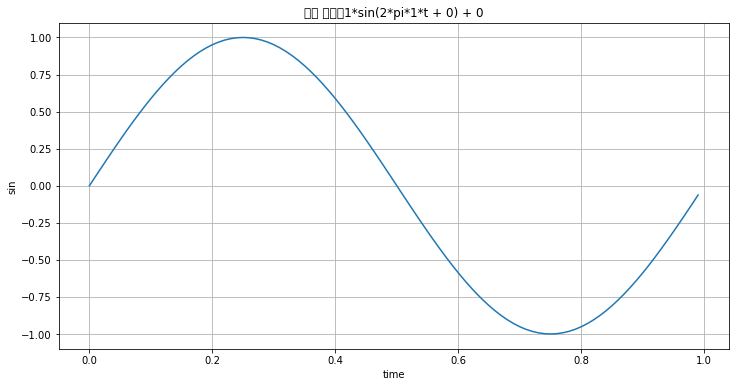

In [11]:
Ds.plotSinWave()

C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sanghui\miniconda3\envs\ds_stud

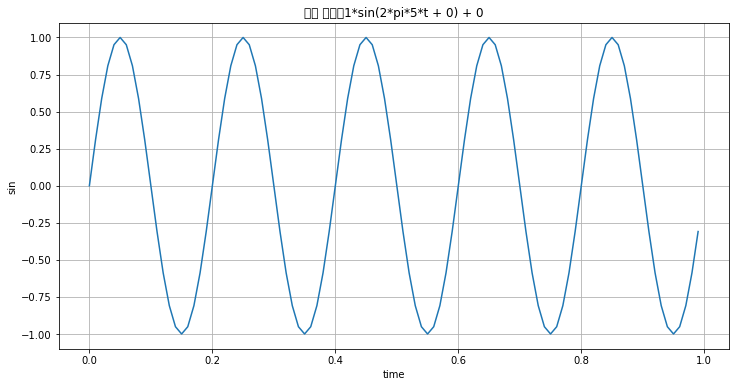

In [12]:
Ds.plotSinWave(freq=5)

## 그래프 한글 설정

In [13]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print('Hangul OK in your Windows!!!')
    rc("font", family=font_name)
else:
    print('Unknown system. sorry!!~')

plt.rcParams["axes.unicode_minus"] = False

Overwriting ./set_matplotlib_hangul.py


In [14]:
import set_matplotlib_hangul
import drawSinWave as dS

Hangul OK in your Windows!!!


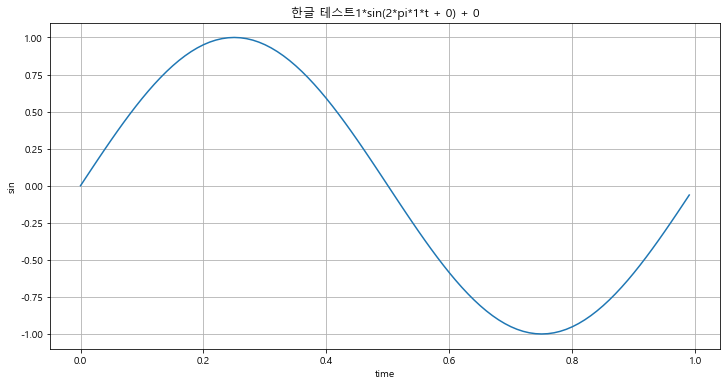

In [15]:
dS.plotSinWave()

---

## 2. Fbprophet 기초

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
time = np.linspace(0, 1, 365 * 2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})
df.head()

ds         y
0 2018-01-01  0.000000
1 2018-01-02  0.103243
2 2018-01-03  0.205382
3 2018-01-04  0.305326
4 2018-01-05  0.402007

<AxesSubplot:>

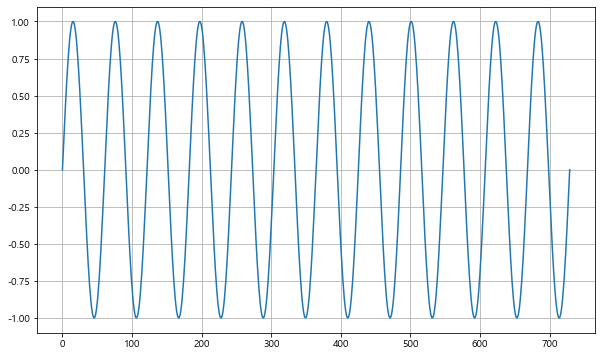

In [18]:
df["y"].plot(figsize=(10, 6), grid=True)

In [19]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [20]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

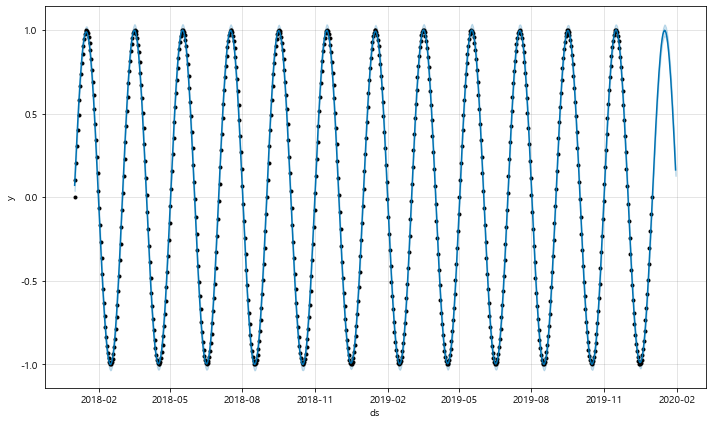

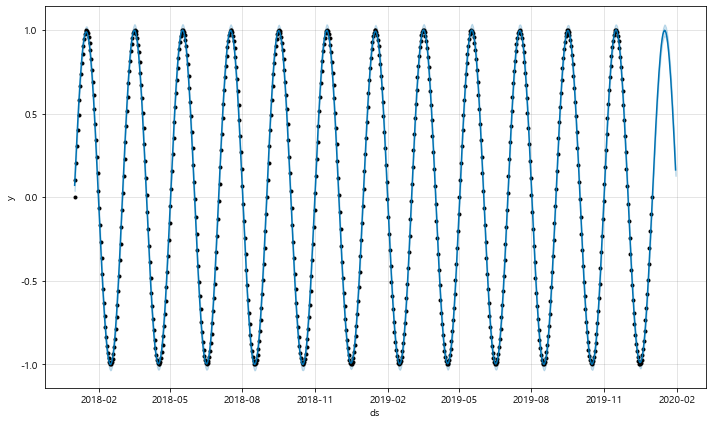

In [21]:
m.plot(forecast)

<AxesSubplot:>

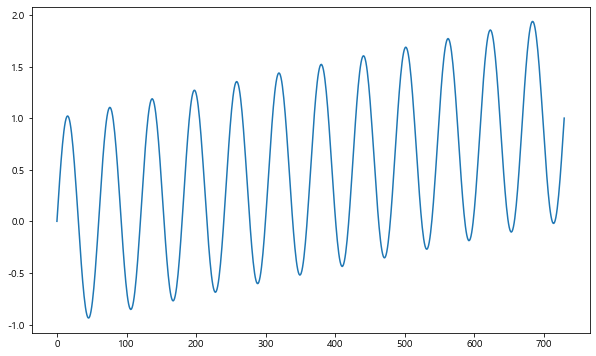

In [22]:
time = np.linspace(0, 1, 365 * 2)
result = np.sin(2*np.pi*12*time) + time
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6))

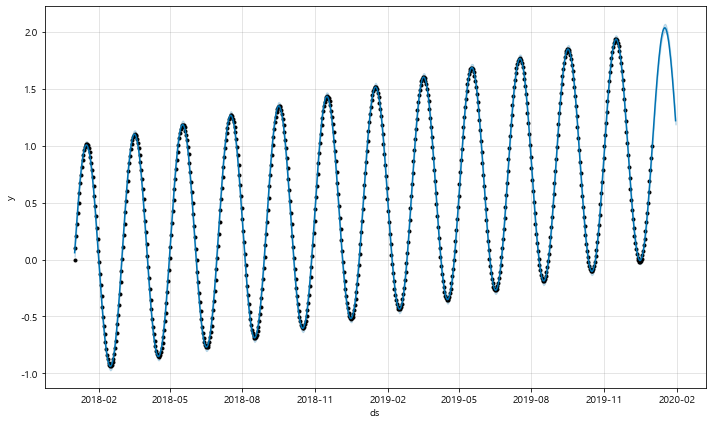

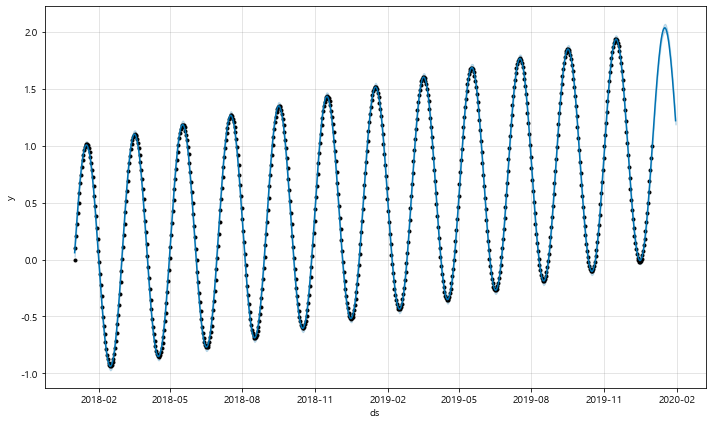

In [23]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

<AxesSubplot:>

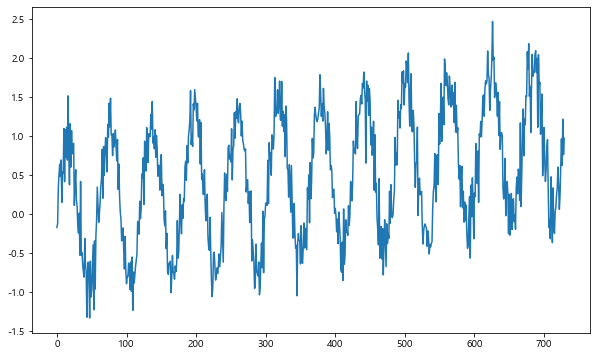

In [24]:
time = np.linspace(0, 1, 365 * 2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365 * 2)/4
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6))

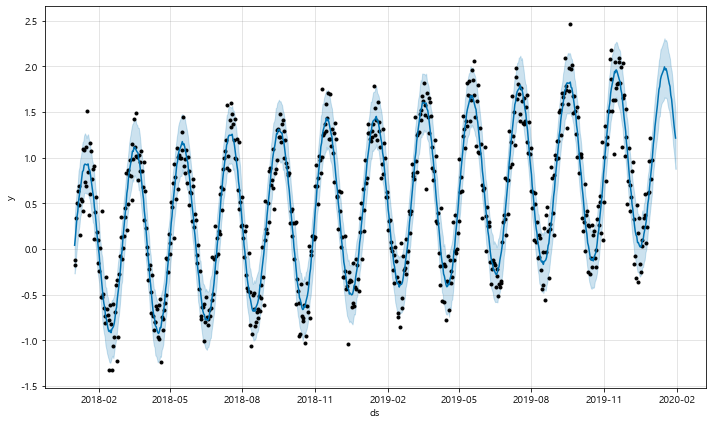

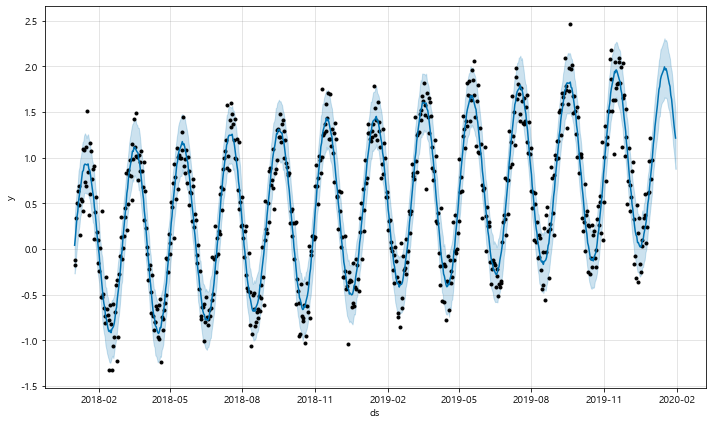

In [25]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

## 3. 시계열 데이터 실전 이용해보기

In [26]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

%matplotlib inline

In [27]:
pinkwink_web = pd.read_csv("../data/05_PinkWink_Web_Traffic.csv", encoding="utf-8", thousands=",", names=["date", "hit"], index_col=0)
pinkwink_web.head()

hit
date            
16. 7. 1.  766.0
16. 7. 2.  377.0
16. 7. 3.  427.0
16. 7. 4.  902.0
16. 7. 5.  850.0

In [28]:
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 16. 7. 1. to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [29]:
# 결측치 데이터값 필터링
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]

In [30]:
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 16. 7. 1. to 17. 6. 30.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


<AxesSubplot:xlabel='date'>

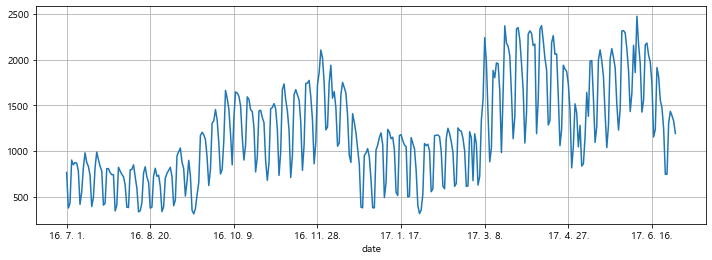

In [31]:
# 전체 데이터 그려보기
pinkwink_web["hit"].plot(figsize=(12, 4), grid=True)

In [32]:
# trend 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0, len(pinkwink_web))
len(time)

365

In [33]:
traffic = pinkwink_web["hit"].values
traffic

array([ 766.,  377.,  427.,  902.,  850.,  876.,  868.,  785.,  417.,
        550.,  818.,  981.,  877.,  833.,  737.,  393.,  489.,  817.,
        989.,  908.,  835.,  782.,  408.,  429.,  808.,  808.,  765.,
        742.,  742.,  344.,  408.,  823.,  781.,  745.,  719.,  629.,
        386.,  382.,  795.,  799.,  850.,  717.,  595.,  335.,  346.,
        433.,  759.,  829.,  716.,  659.,  375.,  386.,  727.,  812.,
        723.,  736.,  613.,  337.,  391.,  704.,  757.,  788.,  823.,
        721.,  401.,  463.,  948.,  993., 1034.,  877.,  808.,  508.,
        669.,  899.,  732.,  352.,  312.,  369.,  522.,  655., 1170.,
       1207., 1178., 1126.,  929.,  623.,  799., 1307., 1331., 1455.,
       1342., 1090.,  749.,  797., 1117., 1665., 1579., 1461., 1188.,
        849., 1364., 1648., 1637., 1601., 1499., 1159.,  902., 1066.,
       1594., 1568., 1453., 1433., 1265.,  772.,  932., 1439., 1448.,
       1367., 1313.,  895.,  680.,  872., 1464., 1476., 1520., 1464.,
       1239.,  734.,

In [34]:
fx = np.linspace(0, time[-1], 1000)

In [35]:
# 에러를 계산할 함수
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [36]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)


f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [37]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


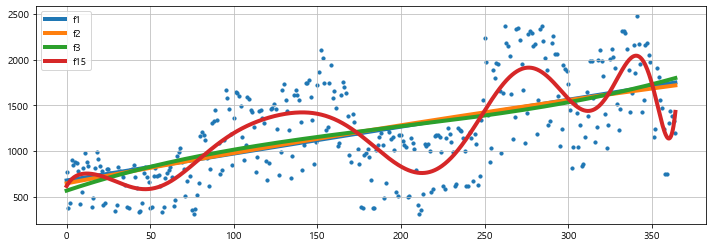

In [38]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label="f1")
plt.plot(fx, f2(fx), lw=4, label="f2")
plt.plot(fx, f3(fx), lw=4, label="f3")
plt.plot(fx, f15(fx), lw=4, label="f15")

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

In [39]:
df = pd.DataFrame({"ds":pinkwink_web.index, "y": pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()

ds      y
0 2016-07-01  766.0
1 2016-07-02  377.0
2 2016-07-03  427.0
3 2016-07-04  902.0
4 2016-07-05  850.0

In [40]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [41]:
# 60일에 해당하는 데이터 예측
future = m.make_future_dataframe(periods=60)
future.tail()

ds
420 2017-08-25
421 2017-08-26
422 2017-08-27
423 2017-08-28
424 2017-08-29

In [42]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다.
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds         yhat   yhat_lower   yhat_upper
420 2017-08-25   896.576571   681.917945  1093.738661
421 2017-08-26   481.544412   262.529411   707.892489
422 2017-08-27   614.212001   404.577354   824.388494
423 2017-08-28  1166.966207   954.900272  1370.302214
424 2017-08-29  1203.000155  1001.370406  1411.362822

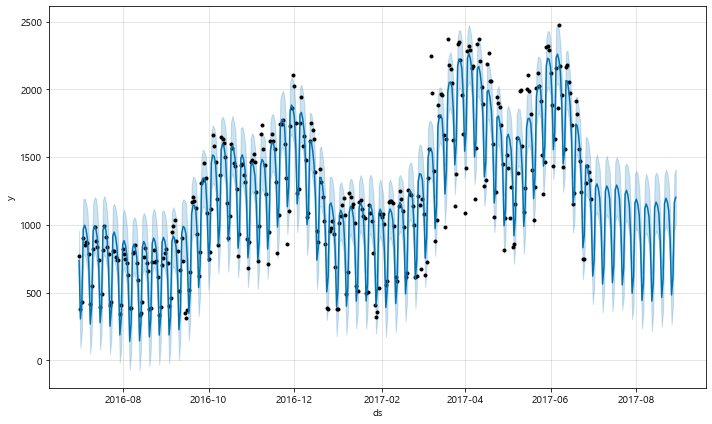

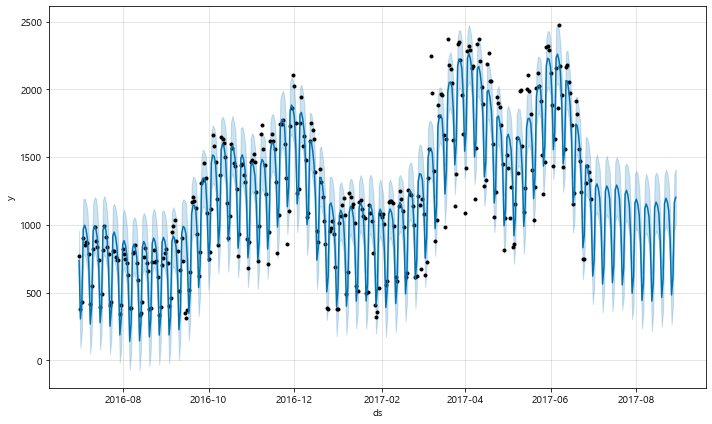

In [43]:
m.plot(forecast)

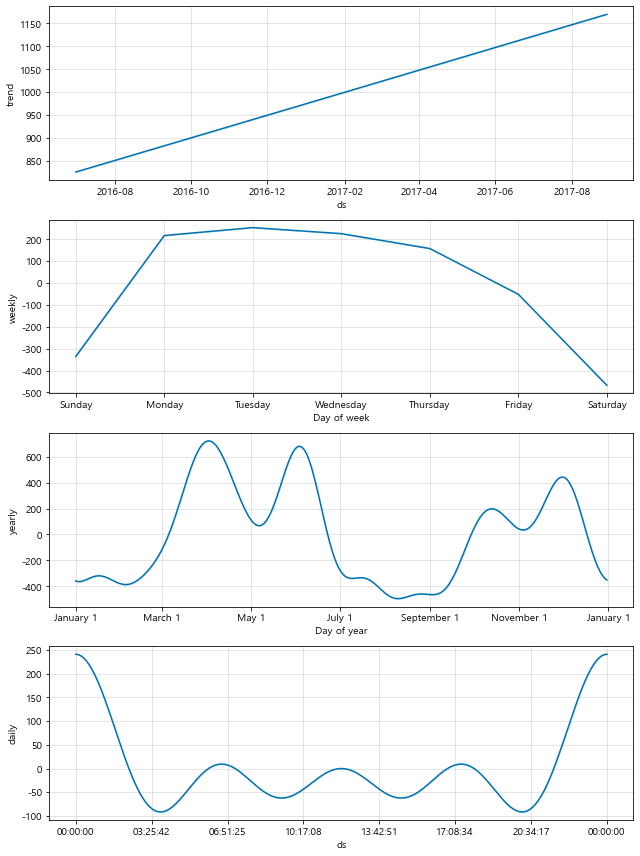

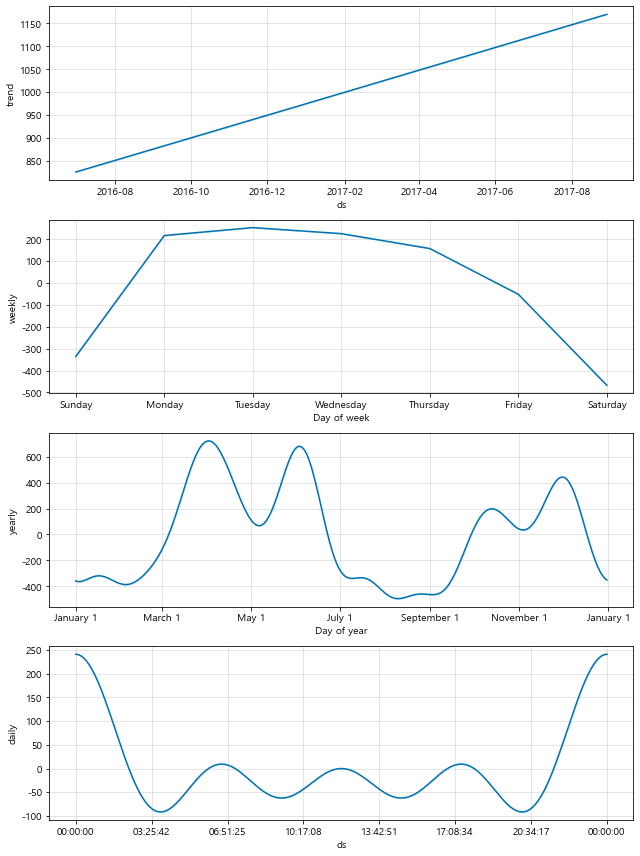

In [44]:
m.plot_components(forecast)

## 4. 주식 데이터 fbprophet 으로 분석하기

In [45]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = "https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=2"
req = Request(url, headers={"User-Agent": "Chrome"})
page = urlopen(req).read()
soup = BeautifulSoup(page, "html.parser")

In [46]:
print(soup.prettify())

<!DOCTYPE html>
<html class="NoJs desktop" id="atomic" lang="en-US">
 <head prefix="og: http://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   NAVER (035420.KS) Stock Historical Prices &amp; Data - Yahoo Finance
  </title>
  <meta content="035420.KS, NAVER, 035420.KS historical prices, NAVER historical prices, historical prices, stocks, quotes, finance" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Discover historical prices for 035420.KS stock on Yahoo Finance. View daily, weekly or monthly format back to when NAVER stock was issued." lang="en-US" name="description"/>
  <meta content="guce.yahoo.com" name

In [49]:
table = soup.find("table")
df_raw = pd.read_html(str(table))[0]
df_raw

Date  \
0                                         Oct 12, 2021   
1                                         Oct 08, 2021   
2                                         Oct 07, 2021   
3                                         Oct 06, 2021   
4                                         Oct 05, 2021   
..                                                 ...   
96                                        May 21, 2021   
97                                        May 20, 2021   
98                                        May 18, 2021   
99                                        May 17, 2021   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  Open  \
0                                            384500.00   
1                                            397500.00   
2                                            380500.00   
3                                            373000.00   
4                                            378500.00   
..                                                 ...   
96                                           355000.00   
97                                           351500.00   
98                                           347000.00   
99                                           345500.00   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  High  \
0                                            387000.00   
1                                            397500.00   
2                                            394000.00   
3                                            383500.00   
4                                            380000.00   
..                                                 ...   
96                                           360000.00   
97                                           355000.00   
98                                           349500.00   
99                                           349000.00   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                   Low  \
0                                            372000.00   
1                                            388000.00   
2                                            378000.00   
3                                            371500.00   
4                                            370000.00   
..                                                 ...   
96                                           353500.00   
97                                           348500.00   
98                                           345000.00   
99                                           341000.00   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                Close*  \
0                                            372000.00   
1                                            388500.00   
2                                            393500.00   
3                                            373000.00   
4                                            370500.00   
..                                                 ...   
96                                           360000.00   
97                                           351000.00   
98                                           349500.00   
99                                           344000.00   
100  *Close price adjusted for splits.**Adjusted cl...   

                                           Adj Close**  \
0                                            372000.00   
1                                            388500.00   
2                                            393500.00   
3                                            373000.00   
4                                            370500.00   
..                                                 ...   
96                                           360000.00   
97                                           351000.00   
98                                         

In [51]:
# fbprophet을 사용하는 형식에 맞춰준 뒤, 맨 마지막 Nan값이 있어서 제외
df_tmp = pd.DataFrame({"ds": df_raw["Date"], "y": df_raw["Close*"]})
df_target = df_tmp[:-1]
df_target

ds          y
0   Oct 12, 2021  372000.00
1   Oct 08, 2021  388500.00
2   Oct 07, 2021  393500.00
3   Oct 06, 2021  373000.00
4   Oct 05, 2021  370500.00
..           ...        ...
95  May 24, 2021  355500.00
96  May 21, 2021  360000.00
97  May 20, 2021  351000.00
98  May 18, 2021  349500.00
99  May 17, 2021  344000.00

[100 rows x 2 columns]

In [52]:
df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"], format="%b %d, %Y")
df.head()

ds          y
0 2021-10-12  372000.00
1 2021-10-08  388500.00
2 2021-10-07  393500.00
3 2021-10-06  373000.00
4 2021-10-05  370500.00

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [54]:
# 데이터형 변환 object => float
df["y"] = df["y"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [55]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [56]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2021-05-17  348718.927587  334126.494639  357090.107777  348718.927587   
1   2021-05-18  348952.649953  336932.947772  360086.599074  348952.649953   
2   2021-05-20  349420.094684  343453.798693  364976.612303  349420.094684   
3   2021-05-21  349653.817050  345137.319330  367194.677813  349653.817050   
4   2021-05-24  350354.984156  348057.545202  370862.573037  350354.984156   
..         ...            ...            ...            ...            ...   
125 2021-11-07  389386.614835  395825.947378  417149.778071  389386.612473   
126 2021-11-08  389620.337116  401756.067137  424472.796632  389620.334611   
127 2021-11-09  389854.059397  403360.491574  425428.110732  389854.056701   
128 2021-11-10  390087.781678  404771.004579  426882.841555  390087.778858   
129 2021-11-11  390321.503960  407427.455972  430865.224905  390321.500988   

       trend_upper  additive_terms  additive_terms_lower  \
0    348718.927587    -3167.476862          -3167.476862   
1    348952.649953     -730.680691           -730.680691   
2    349420.094684     4454.632102           4454.632102   
3    349653.817050     6369.242583           6369.242583   
4    350354.984156     8872.908606           8872.908606   
..             ...             ...                   ...   
125  389386.616991    17355.925242          17355.925242   
126  389620.339431    23677.246207          23677.246207   
127  389854.061828    24917.735504          24917.735504   
128  390087.784256    25962.956500          25962.956500   
129  390321.506647    28338.774151          28338.774151   

     additive_terms_upper         daily  ...       weekly  weekly_lower  \
0            -3167.476862  21674.198468  ...  1480.248682   1480.248682   
1             -730.680691  21674.198468  ...   834.151614    834.151614   
2             4454.632102  21674.198468  ...  1296.429820   1296.429820   
3             6369.242583  21674.198468  ...  1548.409084   1548.409084   
4             8872.908606  21674.198468  ...  1480.248682   1480.248682   
..                    ...           ...  ...          ...           ...   
125          17355.925242  21674.198468  ... -2709.274801  -2709.274801   
126          23677.246207  21674.198468  ...  1480.248682   1480.248682   
127          24917.735504  21674.198468  ...   834.151614    834.151614   
128          25962.956500  21674.198468  ...   259.310410    259.310410   
129          28338.774151  21674.198468  ...  1296.429820   1296.429820   

     weekly_upper        yearly  yearly_lower  yearly_upper  \
0     1480.248682 -26321.924012 -26321.924012 -26321.924012   
1      834.151614 -23239.030772 -23239.030772 -23239.030772   
2     1296.429820 -18515.996185 -18515.996185 -18515.996185   
3     1548.409084 -16853.364970 -16853.364970 -16853.364970   
4     1480.248682 -14281.538544 -14281.538544 -14281.538544   
..            ...           ...           ...           ...   
125  -2709.274801  -1608.998424  -1608.998424  -1608.998424   
126   1480.248682    522.799057    522.799057    522.799057   
127    834.151614   2409.385423   2409.385423   2409.385423   
128    259.310410   4029.447622   4029.447622   4029.447622   
129   1296.429820   5368.145863   5368.145863   5368.145863   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
125                   0.0                         0.0   
126                   0.0                         0.0   
127                   0.0                         0.0   
128                   0.0                         0.0   
129                   0.0                         0.0   

     multip

In [57]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds           yhat     yhat_lower     yhat_upper
125 2021-11-07  406742.540078  395825.947378  417149.778071
126 2021-11-08  413297.583323  401756.067137  424472.796632
127 2021-11-09  414771.794901  403360.491574  425428.110732
128 2021-11-10  416050.738179  404771.004579  426882.841555
129 2021-11-11  418660.278110  407427.455972  430865.224905

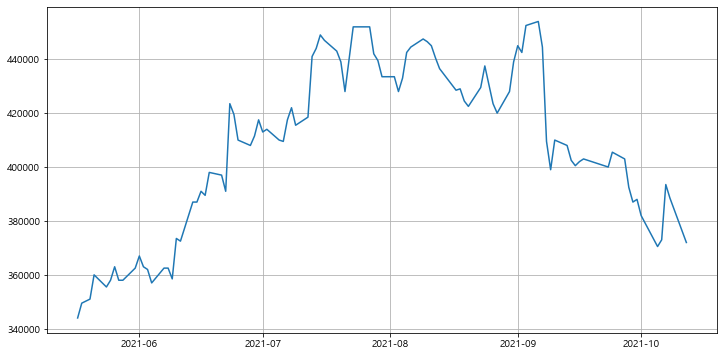

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.show()

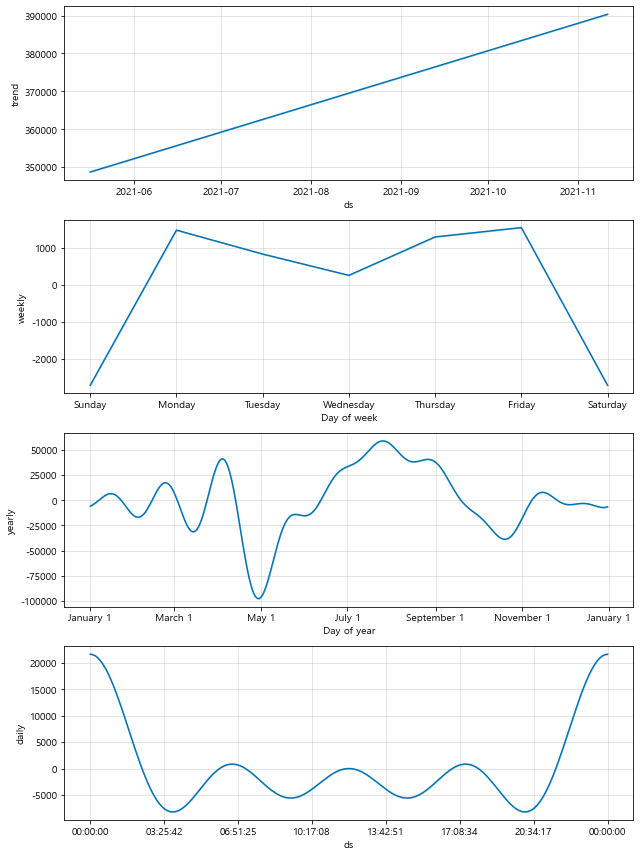

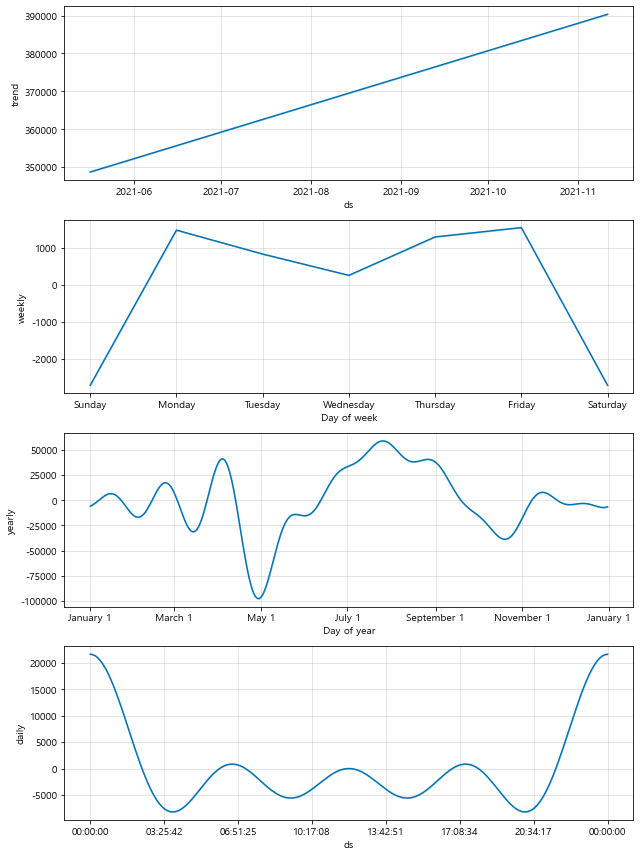

In [59]:
m.plot_components(forecast)

In [60]:
## KIA
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23908 sha256=2df89164ef801528a9def3c5aa3ca2793c26273a105dd20f305f50529f15cc06
  Stored in directory: c:\users\sanghui\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=0c0483c8c6b327641cb05ddc5c6d80b97fff46a48f170261c96db36e3fca3110
  Stored in directory: c:\users\sanghui\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [61]:
# 기아 자동차의 종목코드를 가지고 기간을 입력한다
import yfinance as yf
from pandas_datareader import data

yf.pdr_override()

start_date = "2010-03-01"
end_date = "2018-02-28"
KIA = data.get_data_yahoo("000270.KS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [62]:
KIA.head()

Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2010-03-02  22050.0  22300.0  21800.0  21850.0  17800.664062  3935516
2010-03-03  22100.0  22450.0  21850.0  22400.0  18248.732422  4380617
2010-03-04  22400.0  22600.0  22300.0  22500.0  18330.199219  2490087
2010-03-05  22500.0  22750.0  22350.0  22750.0  18533.871094  2379282
2010-03-08  23050.0  23100.0  22500.0  22800.0  18574.599609  4326618

<AxesSubplot:xlabel='Date'>

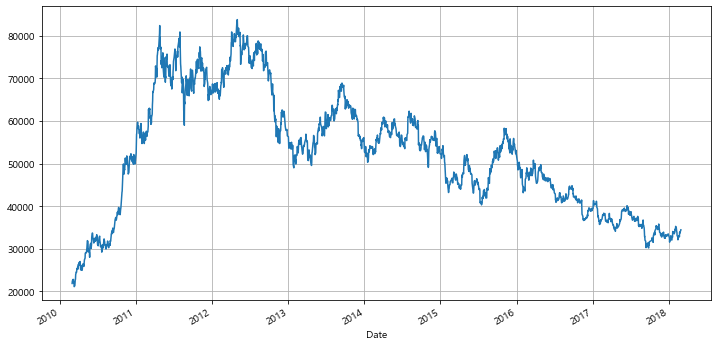

In [63]:
KIA["Close"].plot(figsize=(12, 6), grid=True)

In [64]:
# accuracy 확인을 위한 데이터
KIA_trunc = KIA[:"2017-11-30"]
KIA_trunc.tail()

Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2017-11-24  33150.0  33400.0  32800.0  33050.0  30097.224609   773316
2017-11-27  32800.0  33050.0  32450.0  32750.0  29824.027344  1318245
2017-11-28  32650.0  33450.0  32450.0  32950.0  30006.158203  1350643
2017-11-29  33000.0  33500.0  32700.0  33350.0  30370.421875   884282
2017-11-30  33700.0  34250.0  33500.0  33650.0  30643.621094  2048876

In [65]:
# forecast를 위한 준비
df = pd.DataFrame({"ds": KIA_trunc.index, "y": KIA_trunc["Close"]})
df.reset_index(inplace=True)
df.head()

Date         ds        y
0 2010-03-02 2010-03-02  21850.0
1 2010-03-03 2010-03-03  22400.0
2 2010-03-04 2010-03-04  22500.0
3 2010-03-05 2010-03-05  22750.0
4 2010-03-08 2010-03-08  22800.0

In [66]:
del df["Date"]
df.head()

ds        y
0 2010-03-02  21850.0
1 2010-03-03  22400.0
2 2010-03-04  22500.0
3 2010-03-05  22750.0
4 2010-03-08  22800.0

In [67]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [68]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
2001 2018-02-24  26879.820301  22754.225552  31006.307956
2002 2018-02-25  26962.113329  22871.687672  31118.862139
2003 2018-02-26  27189.323268  23108.674486  31517.004862
2004 2018-02-27  27353.074108  23248.692633  31846.150422
2005 2018-02-28  27398.864477  23155.482442  31539.309765

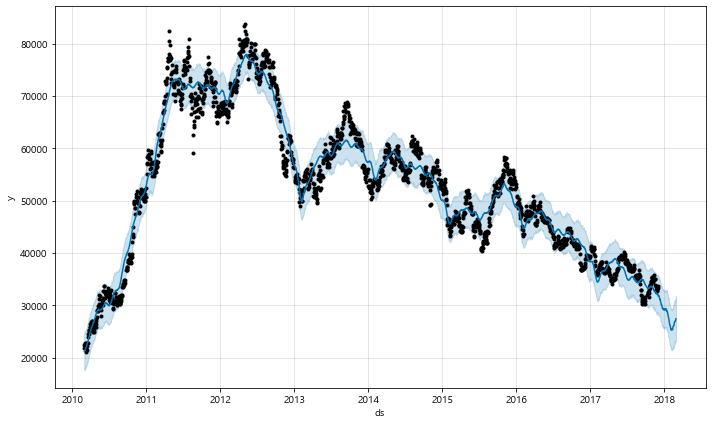

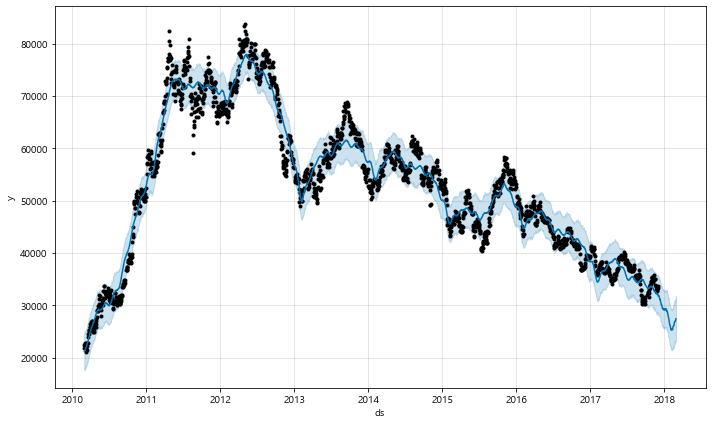

In [69]:
m.plot(forecast)

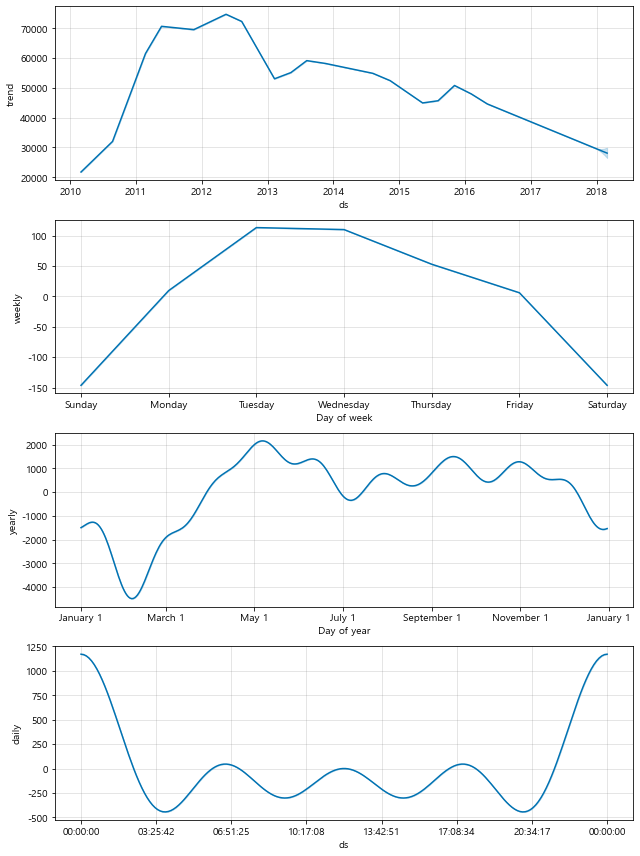

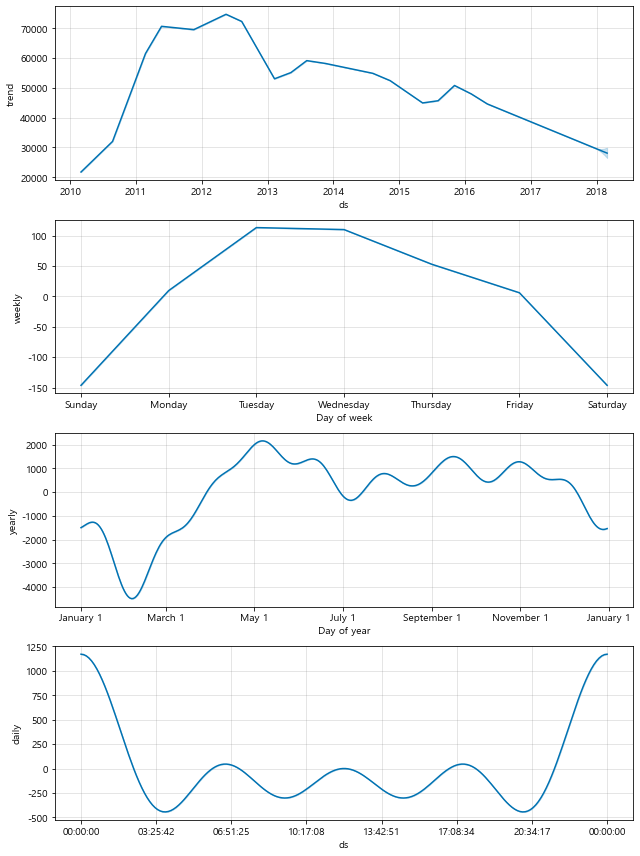

In [70]:
m.plot_components(forecast)

In [71]:
KIA["Close"]

Date
2010-03-02    21850.0
2010-03-03    22400.0
2010-03-04    22500.0
2010-03-05    22750.0
2010-03-08    22800.0
               ...   
2018-02-21    33850.0
2018-02-22    33650.0
2018-02-23    34000.0
2018-02-26    34200.0
2018-02-27    34450.0
Name: Close, Length: 1972, dtype: float64

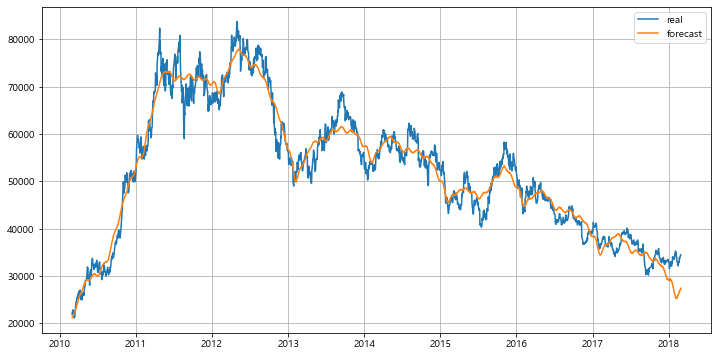

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(KIA.index, KIA["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

#### 3.대한항공

In [74]:
# 003490 대한항공

start_date = "2010-03-01"
end_date = "2018-02-28"
KoreaAir = data.get_data_yahoo("003490.KS", start_date, end_date)
KoreaAir.tail()

[*********************100%***********************]  1 of 1 completed


Open     High      Low    Close     Adj Close  Volume
Date                                                                
2018-02-21  35350.0  35950.0  35150.0  35350.0  35167.996094  237279
2018-02-22  35050.0  35450.0  34800.0  35000.0  34819.800781  260174
2018-02-23  35200.0  35400.0  34550.0  35150.0  34969.027344  321125
2018-02-26  35300.0  35550.0  33600.0  33900.0  33725.460938  932870
2018-02-27  33900.0  34300.0  33650.0  33900.0  33725.460938  527398

<AxesSubplot:xlabel='Date'>

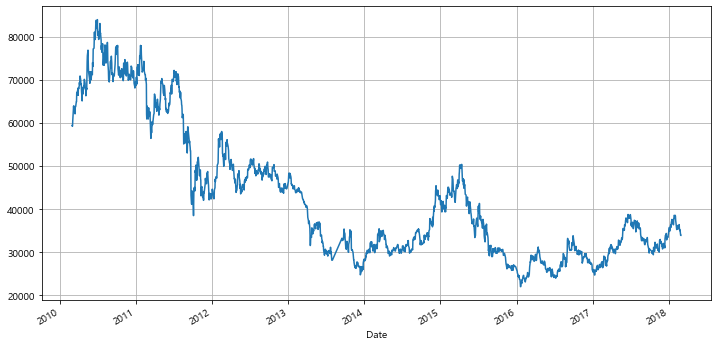

In [75]:
KoreaAir["Close"].plot(figsize=(12, 6), grid=True)

In [76]:
# accuracy 데이터 분리
KoreaAir_trunc = KoreaAir[:"2017-11-30"]
KoreaAir_trunc.tail()

Open     High      Low    Close     Adj Close  Volume
Date                                                                
2017-11-24  32900.0  33250.0  32300.0  32500.0  32168.935547  530941
2017-11-27  32600.0  32800.0  31800.0  31850.0  31525.556641  472095
2017-11-28  32050.0  32500.0  31550.0  31600.0  31278.103516  708754
2017-11-29  31850.0  32250.0  31050.0  31300.0  30981.160156  850385
2017-11-30  31800.0  32050.0  31350.0  31350.0  31030.650391  682573

In [78]:
# forecast를 위한 준비
df = pd.DataFrame({"ds": KoreaAir_trunc.index, "y": KoreaAir_trunc["Close"]})
df.reset_index(inplace=True)

In [80]:
del df["Date"]
df.head()

ds             y
0 2010-03-02  59390.417969
1 2010-03-03  59190.785156
2 2010-03-04  59290.601562
3 2010-03-05  60588.207031
4 2010-03-08  62784.152344

In [81]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [82]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
1970 2018-02-24  34942.008480  30449.454416  38881.130557
1971 2018-02-25  34845.145220  30615.931156  39062.909557
1972 2018-02-26  35719.057199  31243.730563  39916.257548
1973 2018-02-27  35561.138431  31232.785181  40025.934882
1974 2018-02-28  35497.487623  31258.055468  39955.687970

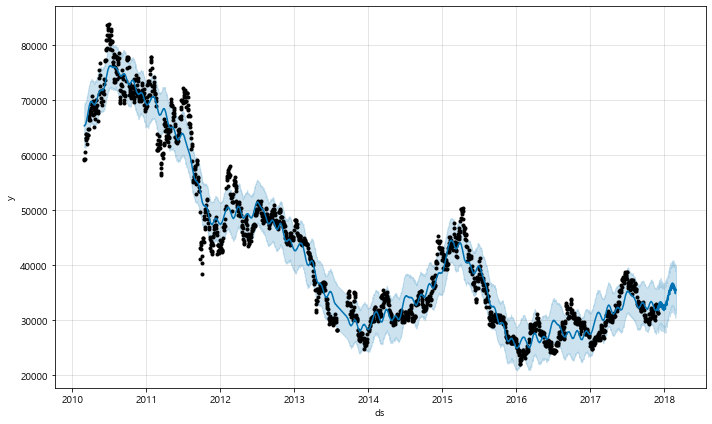

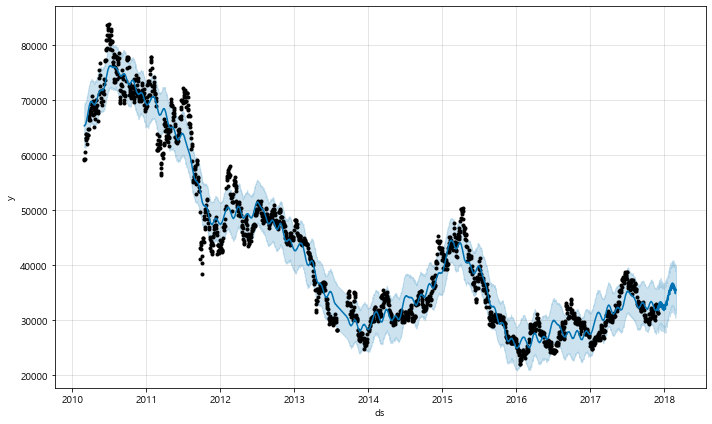

In [83]:
m.plot(forecast)

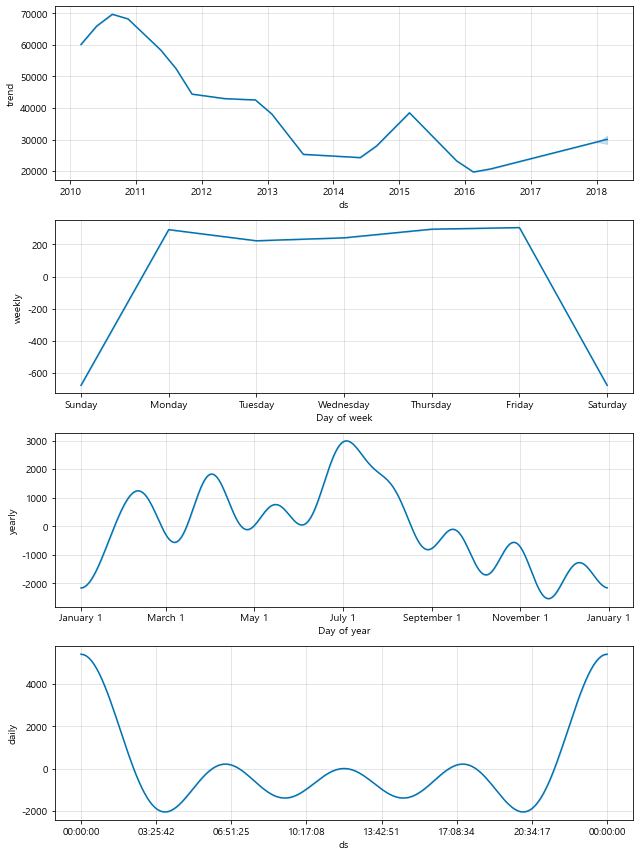

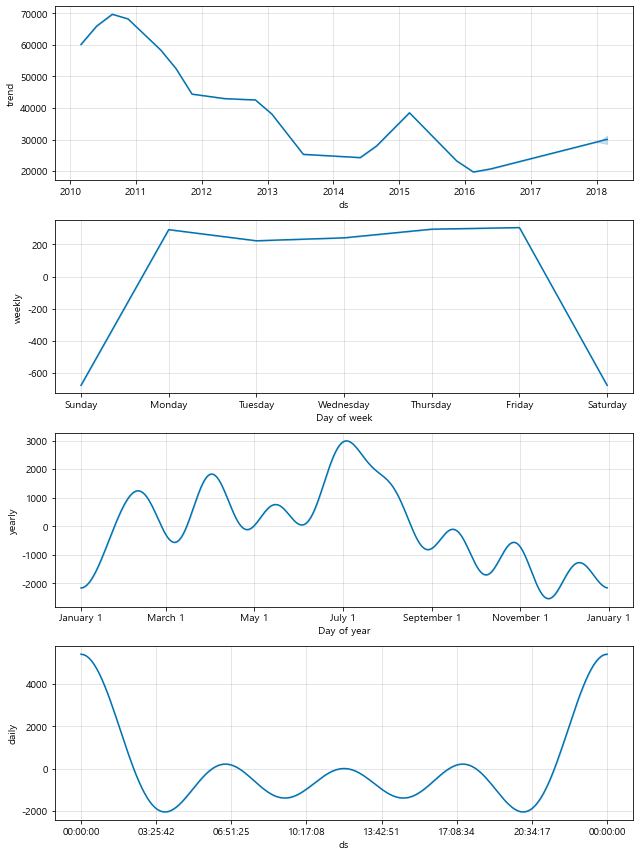

In [84]:
m.plot_components(forecast)

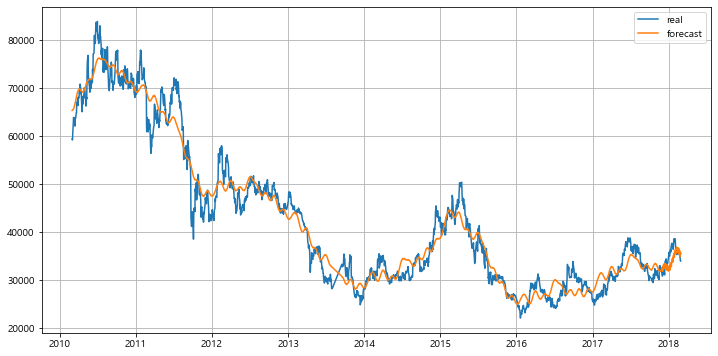

In [86]:
# 실제와 예측값 비교 그래프
plt.figure(figsize=(12, 6))
plt.plot(KoreaAir.index, KoreaAir["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

#### 4. 조금 특이한 형태의 데이터에 대한 forecast

In [87]:
# Logistic 성장형 그래프를 가진 데이터에 대한 forecast
df = pd.read_csv("../data/05_example_wp_R2.csv", index_col=0)
df

ds         y
0     2008-01-30  5.976351
1     2008-01-16  6.049733
2     2008-01-17  6.011267
3     2008-01-14  5.953243
4     2008-01-15  5.910797
...          ...       ...
2858  2015-12-11  7.834788
2859  2015-12-12  7.360104
2860  2015-12-13  7.479864
2861  2015-12-18  7.765145
2862  2015-12-19  7.220374

[2863 rows x 2 columns]

<AxesSubplot:>

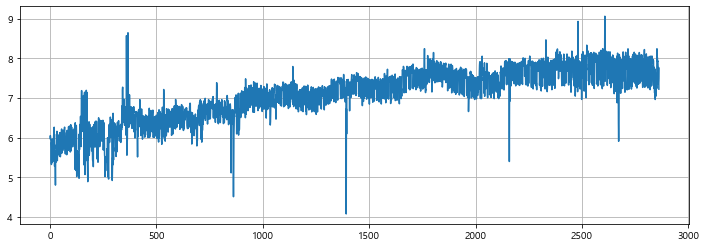

In [88]:
df["y"].plot(figsize=(12, 4), grid=True)

In [90]:
df["cap"] = 8.5
df.tail()

ds         y  cap
2858  2015-12-11  7.834788  8.5
2859  2015-12-12  7.360104  8.5
2860  2015-12-13  7.479864  8.5
2861  2015-12-18  7.765145  8.5
2862  2015-12-19  7.220374  8.5

In [91]:
m = Prophet(growth="logistic",daily_seasonality=True)
m.fit(df)

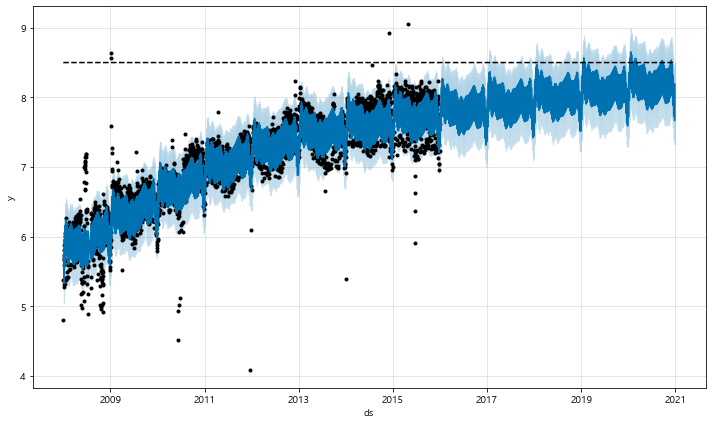

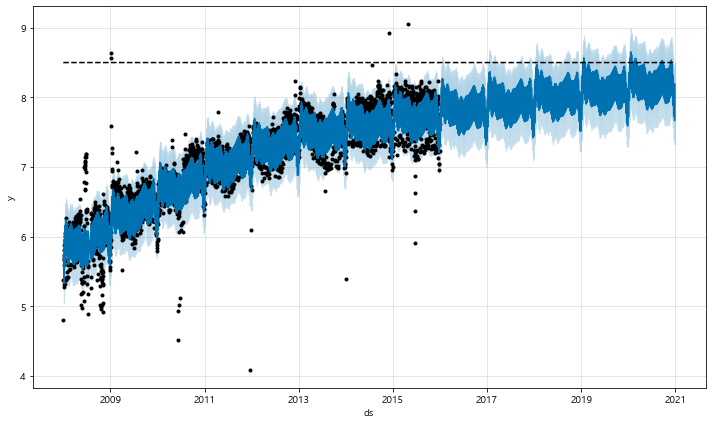

In [92]:
future = m.make_future_dataframe(periods=1826)
future["cap"] = 8.5
forecast = m.predict(future)
m.plot(forecast)

## 5. 비트코인 데이터 fbprophet으로 분석하기

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from fbprophet import Prophet

%matplotlib inline

In [110]:
# url = "https://bitcoincharts.com/charts/bitstampUSD#rg60ztgSzm1g10zm2g25zv"
# 730일 설정해서 다시 하기
url = "https://bitcoincharts.com/charts/bitstampUSD#rg730ztgSzm1g10zm2g25zv"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)
driver.maximize_window()

In [112]:
# 스크롤
xpath = '//*[@id="content_chart"]/div/div[2]/a'
variable = driver.find_element_by_xpath(xpath)
driver.execute_script("return arguments[0].scrollIntoView();", variable)
variable.click()

In [113]:
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
table = soup.find("table", "data")
table

<table class="data" id="chart_table" style="display: table;">
<thead>
<tr>
<th>Timestamp</th><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume (BTC)</th><th>Volume (Currency)</th><th>Weighted Price</th>
</tr>
</thead>
<tbody>
<tr><td>2019-10-14 00:00:00</td><td>8278.39</td><td>8416.67</td><td>8215.41</td><td>8362.99</td><td>4294.61</td><td>35705415.19</td><td>8314.01</td></tr><tr><td>2019-10-15 00:00:00</td><td>8353.33</td><td>8420.85</td><td>8086</td><td>8155.13</td><td>5044.66</td><td>41647353.51</td><td>8255.73</td></tr><tr><td>2019-10-16 00:00:00</td><td>8162.45</td><td>8179.1</td><td>7912.66</td><td>7995.89</td><td>8644.4</td><td>69316753.57</td><td>8018.69</td></tr><tr><td>2019-10-17 00:00:00</td><td>7995.73</td><td>8130.71</td><td>7936.71</td><td>8073.32</td><td>5395.89</td><td>43466038.76</td><td>8055.4</td></tr><tr><td>2019-10-18 00:00:00</td><td>8069.26</td><td>8120.77</td><td>7811.62</td><td>7955.08</td><td>5611.09</td><td>44500999.58</td><td>7930.9</td></tr><tr

In [114]:
driver.quit()

In [115]:
df = pd.read_html(str(table))

In [116]:
bitcoin = df[0]
bitcoin.head()

Timestamp     Open     High      Low    Close  Volume (BTC)  \
0  2019-10-14 00:00:00  8278.39  8416.67  8215.41  8362.99       4294.61   
1  2019-10-15 00:00:00  8353.33  8420.85  8086.00  8155.13       5044.66   
2  2019-10-16 00:00:00  8162.45  8179.10  7912.66  7995.89       8644.40   
3  2019-10-17 00:00:00  7995.73  8130.71  7936.71  8073.32       5395.89   
4  2019-10-18 00:00:00  8069.26  8120.77  7811.62  7955.08       5611.09   

   Volume (Currency)  Weighted Price  
0        35705415.19         8314.01  
1        41647353.51         8255.73  
2        69316753.57         8018.69  
3        43466038.76         8055.40  
4        44500999.58         7930.90

In [117]:
bitcoin.to_csv("../data/05_bitcoin_history.csv", sep=",",encoding="utf-8")

In [118]:
bitcoin = pd.read_csv("../data/05_bitcoin_history.csv", index_col=0)
bitcoin.head()

Timestamp     Open     High      Low    Close  Volume (BTC)  \
0  2019-10-14 00:00:00  8278.39  8416.67  8215.41  8362.99       4294.61   
1  2019-10-15 00:00:00  8353.33  8420.85  8086.00  8155.13       5044.66   
2  2019-10-16 00:00:00  8162.45  8179.10  7912.66  7995.89       8644.40   
3  2019-10-17 00:00:00  7995.73  8130.71  7936.71  8073.32       5395.89   
4  2019-10-18 00:00:00  8069.26  8120.77  7811.62  7955.08       5611.09   

   Volume (Currency)  Weighted Price  
0        35705415.19         8314.01  
1        41647353.51         8255.73  
2        69316753.57         8018.69  
3        43466038.76         8055.40  
4        44500999.58         7930.90

In [119]:
# 분석하고 싶은 항목(CLose)만 가지고, Prophet 적용
df = pd.DataFrame({"ds": bitcoin["Timestamp"], "y": bitcoin["Close"]})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

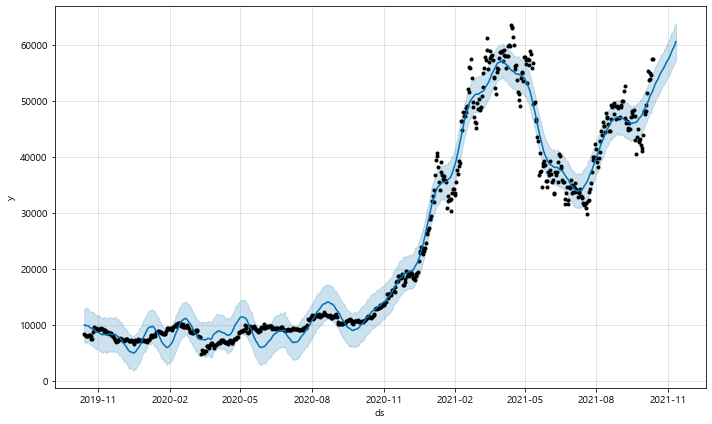

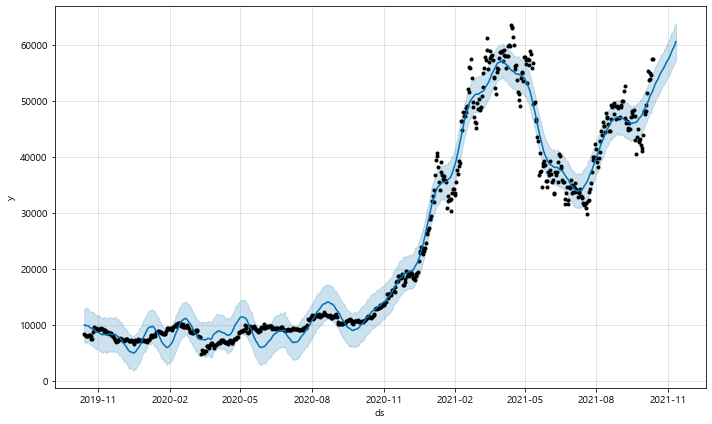

In [121]:
# 향후 30일간의 forecast
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

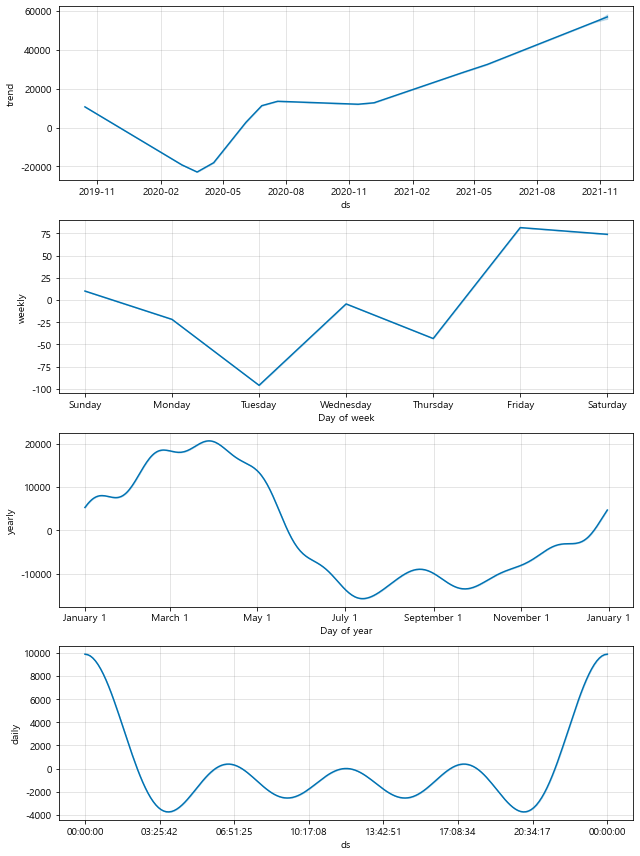

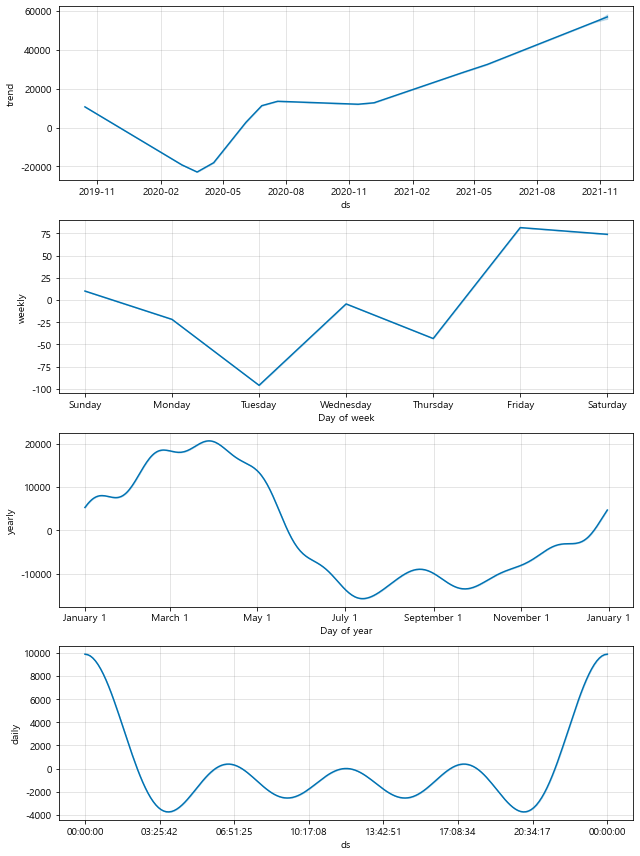

In [122]:
# 트렌드 확인
m.plot_components(forecast)